# LAB 2 

Importing Libraries


In [40]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import StrMethodFormatter
import scipy.stats
import seaborn as sns
from math import sqrt
import scipy.stats
from sklearn.preprocessing import scale
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn import linear_model
from sklearn.preprocessing import PolynomialFeatures
import scipy.stats as stats
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import math
import pylab 
from sklearn.linear_model import  LassoLarsIC

import matplotlib.pyplot as plt
import scipy.stats as stats
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.sandbox.regression.predstd import wls_prediction_std
import warnings
warnings.filterwarnings("ignore",category=DeprecationWarning)


# Importing Dataset from Google Drive 

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [24]:
raw_data = pd.read_csv("/content/drive/MyDrive/DATASET/fraudTrain.csv")
raw_data.head(5)

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,NC,28654,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,WA,99160,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,ID,83252,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,MT,59632,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,VA,24433,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


In [41]:
import os
os.listdir()

['daily_data.csv',
 'irf.png',
 'Workshop3',
 'subsamples_lab_1.csv',
 'MMA_Lab_3_VA.ipynb',
 'MandM_MSA_labs',
 'task_4__final.ipynb',
 'step_6_7.ipynb',
 'subsamples_lab_2.csv',
 'subsamples_lab_3.csv',
 'lab_1.ipynb',
 'oldMMA_Report.pdf',
 'MMA_Lab_2.ipynb',
 'Credit Card Fraud Dataset',
 'Untitled.ipynb',
 'Workshop1.zip',
 'MMA_Lab_4_ VA.ipynb',
 'pdf_MaxL.csv',
 'preprocessed_data.csv',
 '.ipynb_checkpoints',
 'Workshop2',
 'plots',
 'Workshop3.zip',
 'Credit Card Fraud Dataset.zip',
 'Workshop1',
 'pdf_LSq.csv',
 'MMA_Lab3.ipynb']

# Pre Processing the Dataset

In [42]:
if 'preprocessed_data.csv' in os.listdir():
    df = pd.read_csv('preprocessed_data.csv').drop(columns=['Unnamed: 0'])
else:
    df = raw_data.copy()
    df['trans_date_trans_time'] = raw_data['trans_date_trans_time'].apply(lambda x: pd.to_datetime(x))
    df['minute'] = df['trans_date_trans_time'].apply(lambda x: x.hour*60+x.minute)
    df['year_of_birth'] =  df['dob'].apply(lambda x: pd.to_datetime(x).year)
df.head()

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,...,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,minute,year_of_birth
0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,...,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0,0,1988
1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,...,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0,0,1978
2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,...,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0,0,1962
3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,...,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0,1,1967
4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,...,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0,3,1986


In [65]:
df.columns

Index(['trans_date_trans_time', 'cc_num', 'merchant', 'category', 'amt',
       'first', 'last', 'gender', 'street', 'city', 'state', 'zip', 'lat',
       'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time', 'merch_lat',
       'merch_long', 'is_fraud', 'minute', 'year_of_birth',
       'date_of_birth_numeric'],
      dtype='object')

In [71]:
df['gender'].value_counts().shape

(2,)

In [43]:
df['dob'] = pd.to_datetime(df['dob'])
df['date_of_birth_numeric'] = df['dob'].astype(int) / 10**9

In [52]:
cols = ['city_pop', 'amt', 'date_of_birth_numeric', 'lat', 'merch_lat', 'long', 'unix_time', 'merch_long']
subsamples = df[cols].sample(10000)
subsamples.head(3)

,city_pop,amt,date_of_birth_numeric,lat,merch_lat,long,unix_time,merch_long
1143350,7155,66.46,227923200.0,36.0244,36.202775,-90.9288,1366530189,-91.847397
940277,1791,3.58,-139968000.0,31.9571,31.779851,-98.9656,1357831344,-98.168322
216818,67082,12.72,604800.0,33.9845,33.300299,-85.9077,1334945085,-85.373653


In [51]:
# subsamples.to_csv('subsamples_lab_2.csv')
cols = ['city_pop', 'amt', 'date_of_birth_numeric', 'lat', 'merch_lat', 'long', 'unix_time', 'merch_long']
# subsamples=pd.read_csv('subsamples_lab_2.csv', index_col=0)

subsamples.head()

,city_pop,amt,year_of_birth,lat,merch_lat,long,unix_time,merch_long
752544,1078,78.13,1952,36.3850,36.330148,-98.0727,1353193954,-97.116391
1217103,1140,37.74,1986,40.5662,41.479970,-80.2099,1369396751,-80.704198
73221,509,1.10,1980,41.4972,41.777693,-98.7858,1329059827,-98.296913
1242938,1179,12.14,1955,34.5189,35.162478,-112.2523,1370131103,-112.314255
768943,5512,78.95,1980,38.5072,38.454542,-81.8900,1353820620,-81.701749


# Variables
1. City Population
2. Amount 
3. Year of Birth
4. Customer Latitude
5. Merchant Latitude 
6. Customer Longitude 
7. Time
8. Merchant Longitude 

Following is the Plots of the same.  

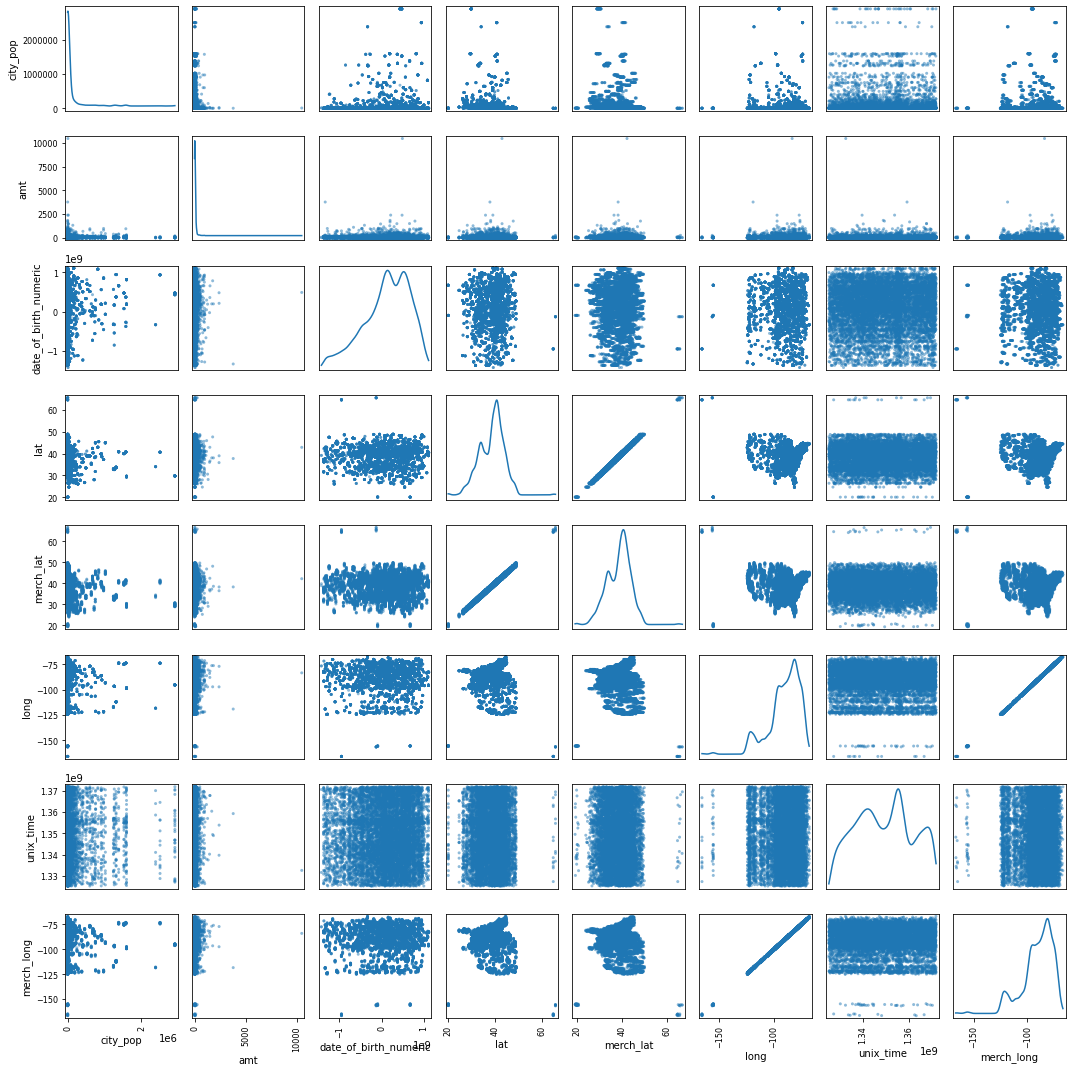

In [53]:
pd.plotting.scatter_matrix(subsamples.loc[:, "city_pop":"merch_long"], diagonal="kde", figsize=(15, 15))
plt.tight_layout()
plt.show()

# Step 1: 
You need to make a non-parametric estimation of PDF in form of histogram and using kernel density function for MRV (or probability law in case of discrete MRV) 

/home/vladimir/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='city_pop', ylabel='Density'>

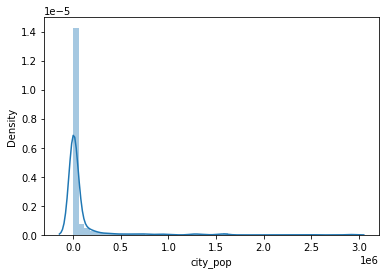

In [54]:
#city population
sns.distplot(subsamples['city_pop'], kde=True)

/home/vladimir/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='amt', ylabel='Density'>

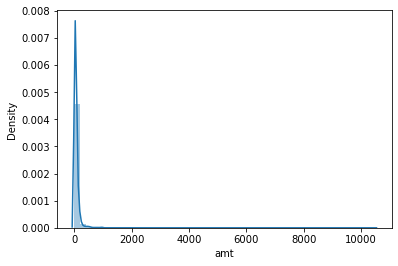

In [55]:
#Amount
sns.distplot(subsamples['amt'], kde=True)

/home/vladimir/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='date_of_birth_numeric', ylabel='Density'>

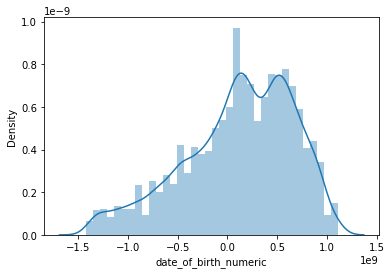

In [56]:
#year of birth
sns.distplot(subsamples['date_of_birth_numeric'], kde=True)

/home/vladimir/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='lat', ylabel='Density'>

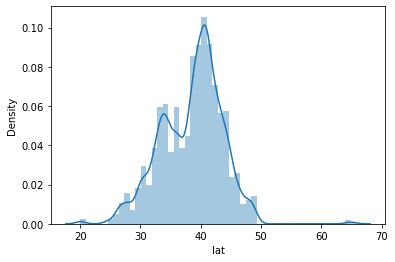

In [12]:
#customer lat
sns.distplot(subsamples['lat'], kde=True)

/home/vladimir/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='merch_lat', ylabel='Density'>

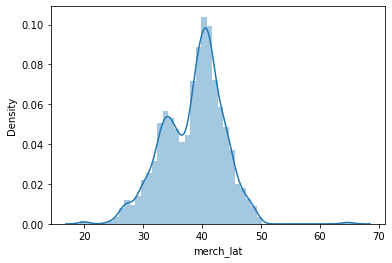

In [13]:
#merchant lat
sns.distplot(subsamples['merch_lat'], kde=True)

/home/vladimir/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='long', ylabel='Density'>

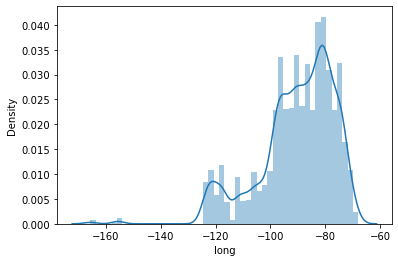

In [14]:
#customer longitude
sns.distplot(subsamples['long'], kde=True)

/home/vladimir/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='unix_time', ylabel='Density'>

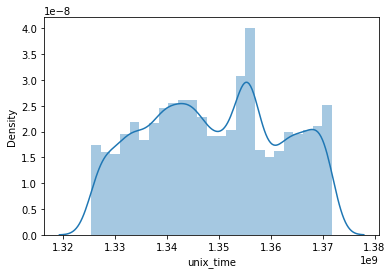

In [15]:
#time
sns.distplot(subsamples['unix_time'], kde=True)

/home/vladimir/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='merch_long', ylabel='Density'>

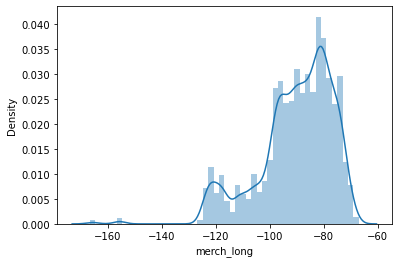

In [16]:
#merchat longitude
sns.distplot(subsamples['merch_long'], kde=True)

In [57]:
# choosing Target Value
y=subsamples['city_pop'].values

# choosing numeric features
x = subsamples.drop(columns=['city_pop'])

# Step 2
You need to make an estimation of multivariate mathematical expectation and
variance.

In [58]:
#UnConditional mean
x.mean()

amt                      6.984606e+01
date_of_birth_numeric    1.096200e+08
lat                      3.860639e+01
merch_lat                3.861441e+01
long                    -9.008935e+01
unix_time                1.349286e+09
merch_long              -9.008486e+01
dtype: float64

In [59]:
x.var()

amt                      2.375094e+04
date_of_birth_numeric    3.052865e+17
lat                      2.578183e+01
merch_lat                2.616341e+01
long                     1.914182e+02
unix_time                1.651371e+14
merch_long               1.916386e+02
dtype: float64

In [60]:
#UnConditional Std
x.cov()

,amt,date_of_birth_numeric,lat,merch_lat,long,unix_time,merch_long
amt,2.375094e+04,8.213790e+08,2.512878e+00,2.159890e+00,1.725303e+01,3.300345e+06,1.724087e+01
date_of_birth_numeric,8.213790e+08,3.052865e+17,-1.102234e+08,-1.136854e+08,2.038182e+08,2.268137e+13,2.064334e+08
lat,2.512878e+00,-1.102234e+08,2.578183e+01,2.580566e+01,-4.515344e-01,-6.474061e+04,-4.327693e-01
merch_lat,2.159890e+00,-1.136854e+08,2.580566e+01,2.616341e+01,-4.383378e-01,-1.405230e+05,-4.208536e-01
long,1.725303e+01,2.038182e+08,-4.515344e-01,-4.383378e-01,1.914182e+02,7.302811e+05,1.913620e+02
unix_time,3.300345e+06,2.268137e+13,-6.474061e+04,-1.405230e+05,7.302811e+05,1.651371e+14,6.865310e+05
merch_long,1.724087e+01,2.064334e+08,-4.327693e-01,-4.208536e-01,1.913620e+02,6.865310e+05,1.916386e+02


# Step 3:
You need to make a non-parametric estimation of conditional distributions,
mathematical expectations and variances. 


In [90]:
# We will use gender as a condition to make conditional distributions
subsamples_cond = pd.merge(subsamples, df['gender'], left_index=True, right_index=True, how='left')
subsamples_cond.head()

,city_pop,amt,date_of_birth_numeric,lat,merch_lat,long,unix_time,merch_long,gender
1143350,7155,66.46,227923200.0,36.0244,36.202775,-90.9288,1366530189,-91.847397,F
940277,1791,3.58,-139968000.0,31.9571,31.779851,-98.9656,1357831344,-98.168322,F
216818,67082,12.72,604800.0,33.9845,33.300299,-85.9077,1334945085,-85.373653,F
225438,2872,49.12,562377600.0,33.2887,33.482543,-111.0985,1335224943,-111.939109,F
603119,75830,9.96,157420800.0,42.4969,43.480670,-83.2911,1347558902,-83.501727,M


<Figure size 576x360 with 0 Axes>

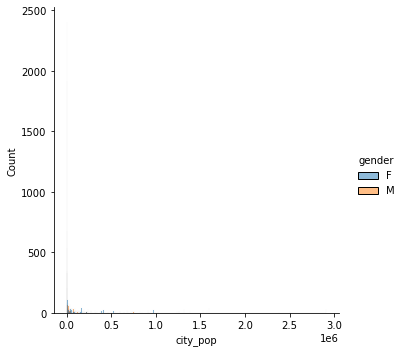

<Figure size 576x360 with 0 Axes>

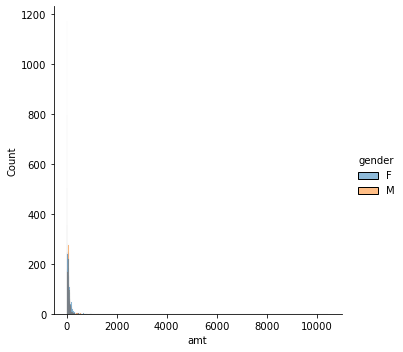

<Figure size 576x360 with 0 Axes>

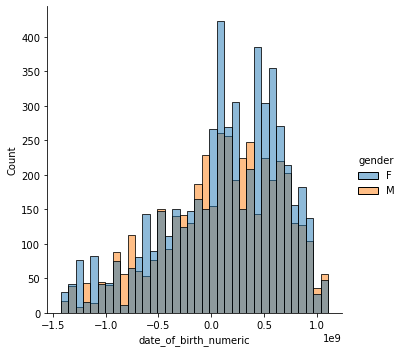

<Figure size 576x360 with 0 Axes>

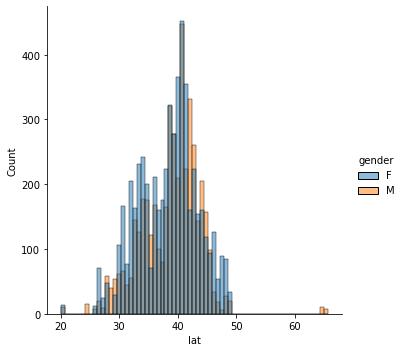

<Figure size 576x360 with 0 Axes>

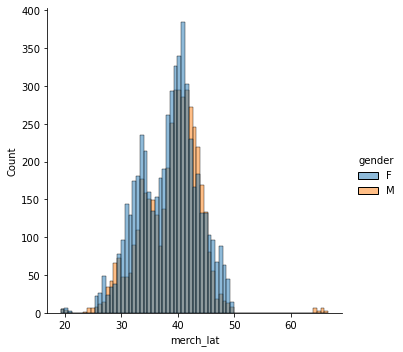

<Figure size 576x360 with 0 Axes>

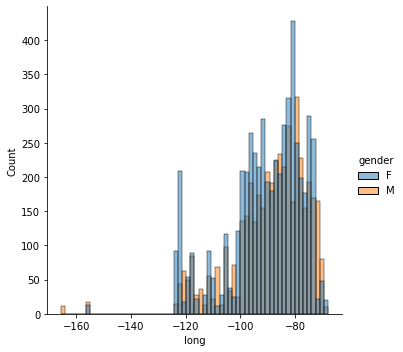

<Figure size 576x360 with 0 Axes>

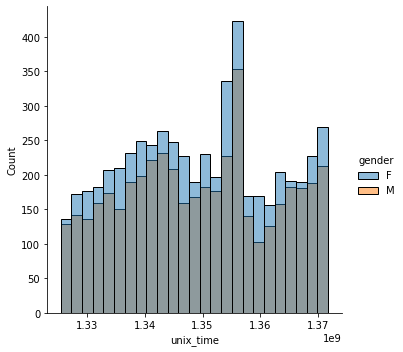

<Figure size 576x360 with 0 Axes>

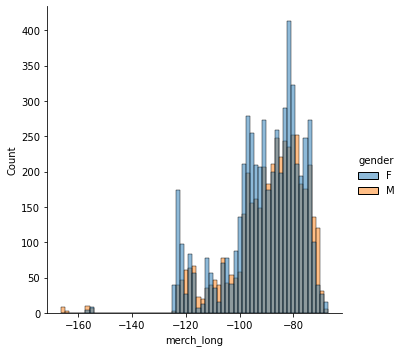

In [92]:
# Conditional distributions
for col in subsamples.columns:
    plt.figure(figsize=(8, 5))
    sns.displot(subsamples_cond, x=col, hue="gender")
    plt.show()



Conditional means

In [95]:
subsamples_cond.groupby('gender').mean()

,city_pop,amt,date_of_birth_numeric,lat,merch_lat,long,unix_time,merch_long
gender,,,,,,,,
F,98299.564625,69.569004,1.195460e+08,38.396599,38.401788,-90.70495,1.349313e+09,-90.703890
M,75703.045788,70.184830,9.748334e+07,38.862903,38.874377,-89.33664,1.349254e+09,-89.327952


Conditional variances

In [96]:
subsamples_cond.groupby('gender').var()

,city_pop,amt,date_of_birth_numeric,lat,merch_lat,long,unix_time,merch_long
gender,,,,,,,,
F,1.192707e+11,31716.244448,3.080036e+17,25.988158,26.358516,189.922794,1.638651e+14,190.257604
M,5.469240e+10,14016.302302,3.017642e+17,25.415634,25.807766,192.259070,1.667271e+14,192.328246


# Step 4:
You need to make an estimation of pair correlation coefficients, confidence intervals for them and significance levels.

In [97]:
subsamples.corr()

,city_pop,amt,date_of_birth_numeric,lat,merch_lat,long,unix_time,merch_long
city_pop,1.000000,-0.002850,0.087866,-0.149567,-0.148926,-0.053383,-0.008732,-0.053209
amt,-0.002850,1.000000,0.009646,0.003211,0.002740,0.008092,0.001666,0.008081
date_of_birth_numeric,0.087866,0.009646,1.000000,-0.039288,-0.040226,0.026662,0.003194,0.026989
lat,-0.149567,0.003211,-0.039288,1.000000,0.993598,-0.006428,-0.000992,-0.006157
merch_lat,-0.148926,0.002740,-0.040226,0.993598,1.000000,-0.006194,-0.002138,-0.005944
long,-0.053383,0.008092,0.026662,-0.006428,-0.006194,1.000000,0.004107,0.999131
unix_time,-0.008732,0.001666,0.003194,-0.000992,-0.002138,0.004107,1.000000,0.003859
merch_long,-0.053209,0.008081,0.026989,-0.006157,-0.005944,0.999131,0.003859,1.000000


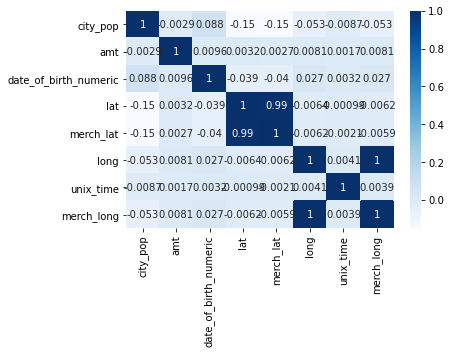

In [98]:
corrMatrix = subsamples.corr()
sns.heatmap(corrMatrix, annot=True, cmap='Blues')
plt.show()

We have all of our variables in different scales, so we will normalize them:

In [99]:
from sklearn import preprocessing
scaler = preprocessing.StandardScaler().fit(subsamples.values)
data_scaled = pd.DataFrame(scaler.transform(subsamples.values), columns=cols)

In [100]:
data_scaled.mean()

city_pop                 4.480860e-17
amt                      2.482112e-17
date_of_birth_numeric    4.884981e-17
lat                      8.897993e-16
merch_lat                2.529643e-16
long                    -3.205880e-16
unix_time               -3.925182e-15
merch_long               7.860379e-18
dtype: float64

In [101]:
data_scaled.var()

city_pop                 1.0001
amt                      1.0001
date_of_birth_numeric    1.0001
lat                      1.0001
merch_lat                1.0001
long                     1.0001
unix_time                1.0001
merch_long               1.0001
dtype: float64

In [102]:
data_scaled.corr()

,city_pop,amt,date_of_birth_numeric,lat,merch_lat,long,unix_time,merch_long
city_pop,1.000000,-0.002850,0.087866,-0.149567,-0.148926,-0.053383,-0.008732,-0.053209
amt,-0.002850,1.000000,0.009646,0.003211,0.002740,0.008092,0.001666,0.008081
date_of_birth_numeric,0.087866,0.009646,1.000000,-0.039288,-0.040226,0.026662,0.003194,0.026989
lat,-0.149567,0.003211,-0.039288,1.000000,0.993598,-0.006428,-0.000992,-0.006157
merch_lat,-0.148926,0.002740,-0.040226,0.993598,1.000000,-0.006194,-0.002138,-0.005944
long,-0.053383,0.008092,0.026662,-0.006428,-0.006194,1.000000,0.004107,0.999131
unix_time,-0.008732,0.001666,0.003194,-0.000992,-0.002138,0.004107,1.000000,0.003859
merch_long,-0.053209,0.008081,0.026989,-0.006157,-0.005944,0.999131,0.003859,1.000000


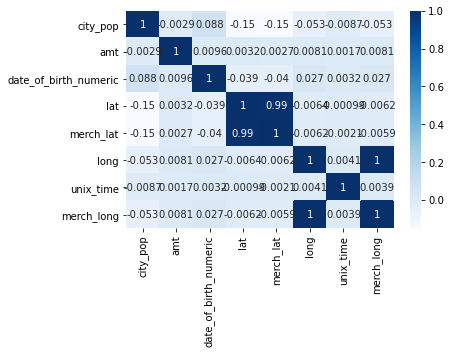

In [103]:
corrMatrix = data_scaled.corr()
sns.heatmap(corrMatrix, annot=True, cmap='Blues')
plt.show()

In [104]:
import scipy.stats as stats
import itertools

def get_conf_interval_for_cor_coef(table, col1, col2):
    x = table[col1].apply(float).values
    y = table[col2].apply(float).values
    print(col1, col2)
    r, p = stats.pearsonr(x,y)
    r_z = np.arctanh(r) # matches Fisher transform
    # Corresponding standard deviation
    se = 1/np.sqrt(x.size-3)
    alpha = 0.05
    z = stats.norm.ppf(1-alpha/2)
    lo_z, hi_z = r_z-z*se, r_z+z*se
    return r, p, lo_z, hi_z

for col1, col2 in list(itertools.product(cols, cols)):
    if col1!=col2:
        print("For {} and {}".format(col1, col2))
        r, p, lo_z, hi_z = get_conf_interval_for_cor_coef(data_scaled, col1, col2)
        print('\tCorrelation coefficient = ', r)
        print('\t"p-value:\t"', p)
        print('\tConfidence interval for the correlation coefficient ', lo_z, hi_z)

For city_pop and amt
city_pop amt
	Correlation coefficient =  -0.0028504752743790367
	"p-value:	" 0.7756345857046807
	Confidence interval for the correlation coefficient  -0.02245306344768334 0.016752097458377874
For city_pop and date_of_birth_numeric
city_pop date_of_birth_numeric
	Correlation coefficient =  0.08786589522926025
	"p-value:	" 1.3377833993249337e-18
	Confidence interval for the correlation coefficient  0.06849048844125448 0.1076956493473157
For city_pop and lat
city_pop lat
	Correlation coefficient =  -0.14956664931942545
	"p-value:	" 4.048372907671682e-51
	Confidence interval for the correlation coefficient  -0.17029972033470092 -0.13109455942863968
For city_pop and merch_lat
city_pop merch_lat
	Correlation coefficient =  -0.1489258665936988
	"p-value:	" 1.0810380624908515e-50
	Confidence interval for the correlation coefficient  -0.16964433933616274 -0.1304391784301015
For city_pop and long
city_pop long
	Correlation coefficient =  -0.05338262979497941
	"p-value:	" 9.2

unix_time date_of_birth_numeric
	Correlation coefficient =  0.003194427920951108
	"p-value:	" 0.7494204249623745
	Confidence interval for the correlation coefficient  -0.0164081416663051 0.022797019239756116
For unix_time and lat
unix_time lat
	Correlation coefficient =  -0.000992196403109209
	"p-value:	" 0.9209737094187452
	Confidence interval for the correlation coefficient  -0.020594777181730483 0.018610383724330732
For unix_time and merch_lat
unix_time merch_lat
	Correlation coefficient =  -0.0021378539518494078
	"p-value:	" 0.8307350656841502
	Confidence interval for the correlation coefficient  -0.02174043766185209 0.017464723244209127
For unix_time and long
unix_time long
	Correlation coefficient =  0.004107486826031931
	"p-value:	" 0.6812932101626598
	Confidence interval for the correlation coefficient  -0.015495070527014671 0.023710090379046544
For unix_time and merch_long
unix_time merch_long
	Correlation coefficient =  0.003859191541903702
	"p-value:	" 0.6995912105033981
	Co

In [105]:
data_scaled

,city_pop,amt,date_of_birth_numeric,lat,merch_lat,long,unix_time,merch_long
0,-0.269441,-0.021972,0.214124,-0.508533,-0.471504,-0.060677,1.341951,-0.127327
1,-0.287288,-0.430004,-0.451743,-1.309604,-1.336241,-0.641593,0.664994,-0.583953
2,-0.070045,-0.370694,-0.197313,-0.910300,-1.038974,0.302258,-1.116049,0.340339
3,-0.283692,-0.134493,0.819471,-1.047340,-1.003343,-1.518583,-1.094270,-1.578760
4,-0.040937,-0.388604,0.086517,0.766252,0.951416,0.491391,-0.134423,0.475568
...,...,...,...,...,...,...,...,...
9995,-0.291261,-0.420660,-0.690848,1.014532,0.864902,-2.341333,0.723598,-2.275445
9996,-0.288523,-0.408136,-0.434854,1.046734,0.875654,-2.362989,-1.147480,-2.376337
9997,-0.290885,0.237460,-0.156341,0.055346,-0.067398,-0.121401,0.808643,-0.190574
9998,-0.291697,-0.268491,-1.040827,-0.897990,-0.814374,-0.048852,0.614686,0.010209


In [106]:
#Corelation = -0.0067 (considering Sign) --- Absolute Corelation = 0.0178
#P value = 2.52309

<AxesSubplot:>

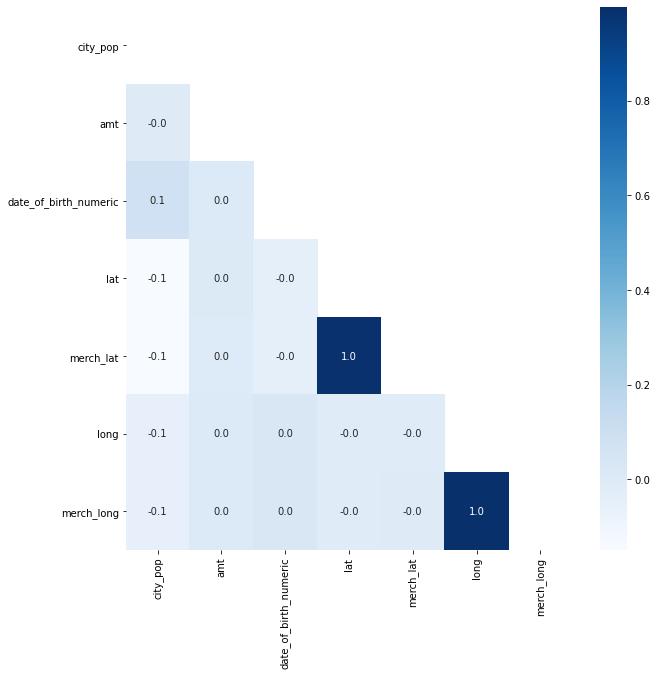

In [108]:
# selection of columns to build a correlation matrix
X_train = data_scaled[['city_pop', 'amt','date_of_birth_numeric','lat', 'merch_lat', 'long', 'merch_long']]

# building a diagonal mask
mask = np.zeros_like(X_train.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(10, 10))

sns.heatmap(X_train.corr(), mask = mask, annot=True, fmt= '.1f', ax = ax, cmap = 'Blues')

# Step 5:
Choose a task formulation for regression. Estimate multivariate correlation (target - predictors).

In [109]:
data_scaled.corr().apply(np.abs).sum().sort_values()

unix_time                1.024690
amt                      1.036287
date_of_birth_numeric    1.233872
city_pop                 1.504533
merch_long               2.103370
long                     2.103997
lat                      2.199241
merch_lat                2.199765
dtype: float64

Lattitude and longitude corellates to merchant coordinates too much, so we will choose city_pop as target variable.

Multivariate corellation (target - predictors):

In [110]:
data_scaled.corr()['city_pop'].drop('city_pop')

amt                     -0.002850
date_of_birth_numeric    0.087866
lat                     -0.149567
merch_lat               -0.148926
long                    -0.053383
unix_time               -0.008732
merch_long              -0.053209
Name: city_pop, dtype: float64

# Step 6:
Build regression model and make an analysis of multicollinearity and regularization (if needed).

In [111]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.model_selection import train_test_split

X = subsamples[cols].drop(columns=['city_pop']).values
y = subsamples['city_pop'].values

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3, random_state = 42)
# Create a linear regression model
reg = LinearRegression(normalize=True)
# Train a linear regression model
reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)
params = np.append(reg.intercept_,reg.coef_)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
print('Mean absolute error = ', mae)
print('Mean squared error = ', mse)

Mean absolute error =  138992.13471231927
Mean squared error =  106406781452.73973


In [112]:
#If normalized:
X = data_scaled[cols].drop(columns=['city_pop']).values
y = data_scaled['city_pop'].values

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3, random_state = 2)
# Create a linear regression model
reg = LinearRegression()
# Train a linear regression model
reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)
params = np.append(reg.intercept_,reg.coef_)
mae_scaled = mean_absolute_error(y_test, y_pred)
mse_scaled = mean_squared_error(y_test, y_pred)
print('Mean absolute error = ', mae_scaled)
print('Mean squared error = ', mse_scaled)

Mean absolute error =  0.4291839108394685
Mean squared error =  0.8817864304362535


#### We will try linear models with regularization

In [113]:
from sklearn.linear_model import Ridge, Lasso, Lars, ElasticNet

X = data_scaled[cols].drop(columns=['city_pop']).values
y = data_scaled['city_pop'].values

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3, random_state = 2)
best_alpha=0
best_mae=1000000
for alpha in np.linspace(0, 1, 10):
    # Create a linear regression model
    reg = Ridge(alpha=alpha)
    # Train a linear regression model
    reg.fit(X_train, y_train)
    y_pred = reg.predict(X_test)
    params = np.append(reg.intercept_,reg.coef_)
    mae_scaled_ridge = mean_absolute_error(y_test, y_pred)
#     mse_scaled_ridge = mean_squared_error(y_test, y_pred)
    if best_mae>mae_scaled_ridge:
        best_mae=mae_scaled_ridge
        best_alpha=alpha
#     print('Mean absolute error = ', mae_scaled_ridge)
#     print('Mean squared error = ', mse_scaled_ridge)
print(best_mae, best_alpha)

0.4291817369623688 1.0


In [114]:
best_alpha=0
best_mae=1000000
for alpha in np.linspace(0, 1, 10):
    # Create a linear regression model
    reg = Lasso(alpha=alpha)
    # Train a linear regression model
    reg.fit(X_train, y_train)
    y_pred = reg.predict(X_test)
    params = np.append(reg.intercept_,reg.coef_)
    mae_scaled_lasso = mean_absolute_error(y_test, y_pred)
#     mse_scaled_ridge = mean_squared_error(y_test, y_pred)
    if best_mae>mae_scaled_lasso:
        best_mae=mae_scaled_lasso
        best_alpha=alpha
#     print('Mean absolute error = ', mae_scaled_ridge)
#     print('Mean squared error = ', mse_scaled_ridge)
print(best_mae, best_alpha)

<ipython-input-114-d6d3b102ee90>:7: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  reg.fit(X_train, y_train)
/home/vladimir/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(


0.42918318873775974 0.0


/home/vladimir/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3517.534223194219, tolerance: 0.7291025095229883
  model = cd_fast.enet_coordinate_descent(


In [115]:
best_alpha=0
best_mae=1000000
# Create a linear regression model
reg = Lars()
# Train a linear regression model
reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)
params = np.append(reg.intercept_,reg.coef_)
mae_scaled_Lars = mean_absolute_error(y_test, y_pred)
#     mse_scaled_ridge = mean_squared_error(y_test, y_pred)
#     print('Mean absolute error = ', mae_scaled_ridge)
#     print('Mean squared error = ', mse_scaled_ridge)
print(mae_scaled_Lars)

0.4291839108394686


In [116]:
best_alpha=0
best_mae=1000000
for alpha in np.linspace(0, 1, 10):
    # Create a linear regression model
    reg = ElasticNet(alpha=alpha)
    # Train a linear regression model
    reg.fit(X_train, y_train)
    y_pred = reg.predict(X_test)
    params = np.append(reg.intercept_,reg.coef_)
    mae_scaled_net = mean_absolute_error(y_test, y_pred)
#     mse_scaled_ridge = mean_squared_error(y_test, y_pred)
    if best_mae>mae_scaled_net:
        best_mae=mae_scaled_net
        best_alpha=alpha
#     print('Mean absolute error = ', mae_scaled_ridge)
#     print('Mean squared error = ', mse_scaled_ridge)
print(best_mae, best_alpha)

<ipython-input-116-74a220d5e571>:7: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  reg.fit(X_train, y_train)
/home/vladimir/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(


0.42918318873775974 0.0


/home/vladimir/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3517.534223194219, tolerance: 0.7291025095229883
  model = cd_fast.enet_coordinate_descent(


Regularization did not made a lot of effort, but still Ridge made the best prediction

In [117]:
X = data_scaled[cols].drop(columns=['city_pop']).values
y = data_scaled['city_pop'].values

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3, random_state = 42)

reg = Ridge()
# Train a linear regression model
reg.fit(X_train, y_train)
y_pred_lin = reg.predict(X_test)
params = np.append(reg.intercept_,reg.coef_)
mae_scaled_ridge = mean_absolute_error(y_test, y_pred)
mse_scaled_ridge = mean_squared_error(y_test, y_pred)

Text(0, 0.5, 'Real')

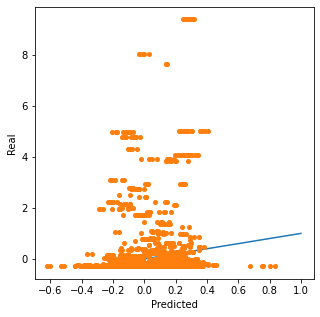

In [118]:
plt.figure(figsize=(5, 5))
plt.plot(np.linspace(0, 1, 3), np.linspace(0, 1, 3))
plt.plot(y_pred_lin, y_test, ls="", marker="o", markersize=4)
plt.xlabel(f'Predicted')
plt.ylabel('Real')

Since Linear models did not show a great reult and corellation of data is low, we will try non-linear regresion:

In [119]:
from sklearn.ensemble import RandomForestRegressor

best_mae = 1000000
best_mse = 1000000
best_depth = 0

for depth in range(1, 10):
    reg = RandomForestRegressor(max_depth=depth, random_state=42)
    reg.fit(X_train, y_train)
    y_pred = reg.predict(X_test)
    mae_scaled_forest = mean_absolute_error(y_test, y_pred)
    mse_scaled_forest = mean_squared_error(y_test, y_pred)
    print(depth, ':', mae_scaled_forest, mse_scaled_forest)
    if mae_scaled_forest<best_mae:
        best_mae = mae_scaled_forest
        best_mse = mse_scaled_forest
        best_depth = depth
        best_res = y_pred

1 : 0.46133864943009006 1.1419701439995615
2 : 0.4060219816820313 0.8231237099143085
3 : 0.3752910121099848 0.6644680019143961
4 : 0.32086483364740737 0.47534741456727475
5 : 0.28555327776436723 0.38698468761774923
6 : 0.24746811335951482 0.31613742034852477
7 : 0.2175054778040484 0.2684404116990952
8 : 0.19127680522803453 0.22111174181903875
9 : 0.16347186559850255 0.16942203396680183


# Step 7
Analyze the quality of regression model (distribution of residuals, determination coefficient).

Mean absolute error =  0.16347186559850255
Mean squared error =  0.16942203396680183


Text(0, 0.5, 'Real')

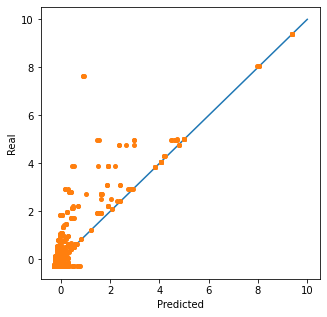

In [120]:
print('Mean absolute error = ', best_mae)
print('Mean squared error = ', best_mse)
max_val = int(max(y_test.max(), y_pred.max())+1)
plt.figure(figsize=(5, 5))
plt.plot(np.linspace(0, max_val, 3), np.linspace(0, max_val, 3))
plt.plot(best_res, y_test, ls="", marker="o", markersize=4)
plt.xlabel(f'Predicted')
plt.ylabel('Real')

MAE is lower, MSE is lower, QQ plot looks better, so we can conclude, that our data have non-linear dependence.

Text(0, 0.5, 'Age')

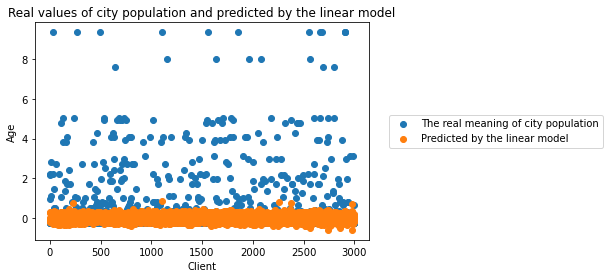

In [121]:
plt.scatter(range(y_test.shape[0]), y_test, label = u'The real meaning of city population')
plt.scatter(range(y_test.shape[0]), y_pred_lin, label = u'Predicted by the linear model')
plt.title(u'Real values of city population and predicted by the linear model')
plt.legend(loc="center right",borderaxespad=0.1, bbox_to_anchor=(1.7, 0.5))
plt.xlabel(u'Client')
plt.ylabel(u'Age')

Text(0, 0.5, 'Age')

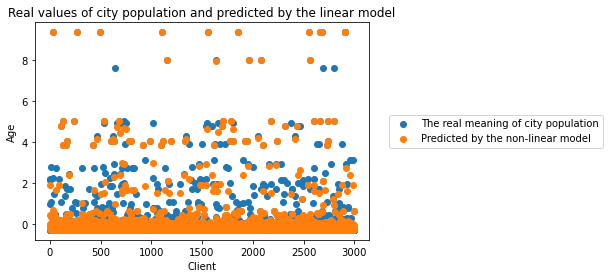

In [122]:
plt.scatter(range(y_test.shape[0]), y_test, label = u'The real meaning of city population')
plt.scatter(range(y_test.shape[0]), best_res, label = u'Predicted by the non-linear model')
plt.title(u'Real values of city population and predicted by the linear model')
plt.legend(loc="center right",borderaxespad=0.1, bbox_to_anchor=(1.7, 0.5))
plt.xlabel(u'Client')
plt.ylabel(u'Age')

In [123]:
from sklearn.metrics import r2_score
print("Linear model: {}\nNon-linear model: {}".format(r2_score(y_test, y_pred_lin), r2_score(y_test, best_res)))

Linear model: 0.028564504633476706
Non-linear model: 0.86022789415456


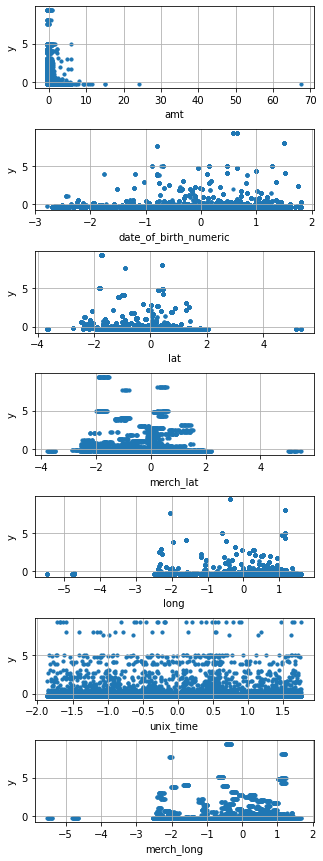

In [124]:
X = data_scaled.drop(columns=['city_pop'])
y = data_scaled[['city_pop']]
# X = pd.DataFrame(scaler.fit_transform(X))

# Creation of subplot - several charts in one picture
fig, axs = plt.subplots(len(X.columns), 1, figsize=(5, 15))
plt.subplots_adjust(wspace=0, hspace=0.5)

# fig.set(size=(10, 10))

for i, col in enumerate(X.columns):
    axs[i].scatter(X[[col]],y,s=10)
    axs[i].set_xlabel(col)
    axs[i].set_ylabel('y')
    axs[i].grid(True)

In [127]:
# Selection of the three most significant features
X = subsamples[['city_pop', 'amt', 'date_of_birth_numeric']]
# Normalization of features
scaler = StandardScaler()
y = subsamples[['date_of_birth_numeric']]
X = pd.DataFrame(scaler.fit_transform(X))
X.columns = ['city_pop','amt','date_of_birth_numeric']
scaler = StandardScaler()
y = pd.DataFrame(scaler.fit_transform(y))
y.columns = ['date_of_birth_numeric']
# Division into test and training samples
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)
# Create and train a linear regression model
reg = LinearRegression(normalize=True)
reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)
y_pred_all = np.array(reg.predict(X))

/home/vladimir/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:>

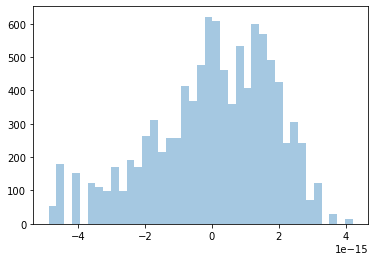

In [128]:
# Plotting the distribution of residuals
y1 = np.array(y)
y2 = np.array(y_pred_all)
y_diff = y1[:,0] - y2[:,0]
sns.distplot(y_diff, kde=False)

In [129]:
#Confidence interval of regression coef 
import numpy as np, statsmodels.api as sm
mod = sm.OLS(train_Y, train_X)
res = mod.fit()
print (res.conf_int(0.01))  


NameError: name 'train_Y' is not defined

KeyboardInterrupt: 

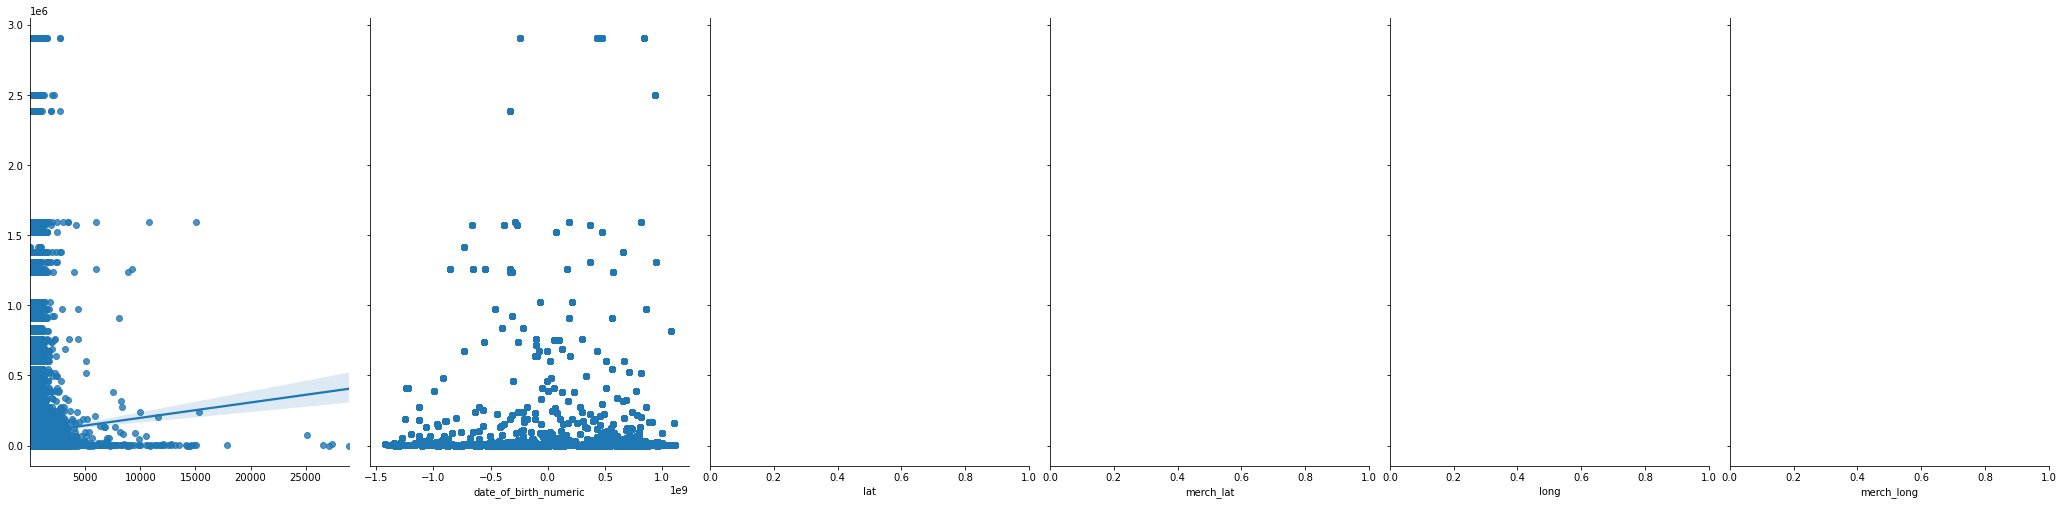

In [130]:
#Model Evaluation
sns.pairplot(df, x_vars=['amt',	'date_of_birth_numeric', 'lat',	'merch_lat', 'long',	'merch_long'], y_vars='city_pop', height=7, aspect=0.7, kind='reg')